In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Pearson Correlation

In [6]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


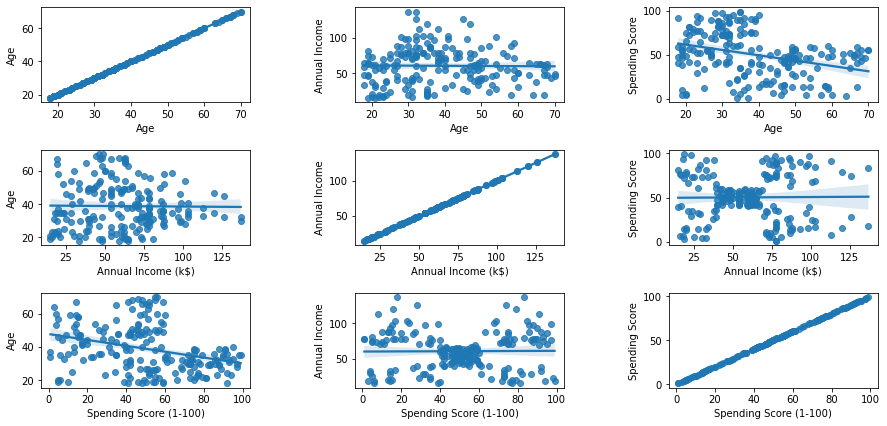

In [7]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

### From the plots and correlation we can observe that there Spending Score and Age are inversely related.

### Distplot

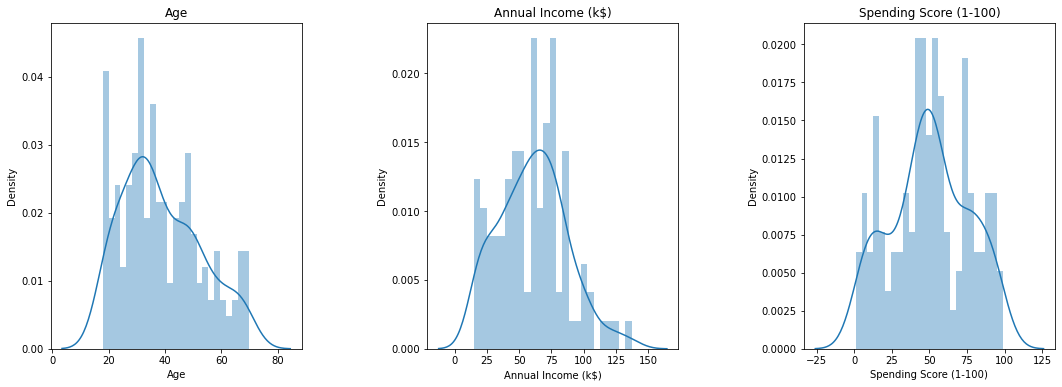

In [8]:
plt.figure(1 , figsize = (18 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.3 , wspace = 0.5)
    sns.distplot(df[x] , bins = 25)
    plt.title('{}'.format(x))
plt.show()

### Gender

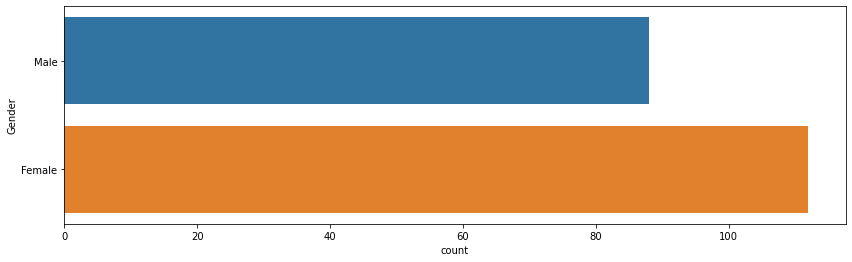

In [9]:
plt.figure(1 , figsize = (14 , 4))
sns.countplot(y = 'Gender' , data = df)
plt.show()

In [10]:
group_by_gender = df.groupby('Gender', as_index = False).agg({'CustomerID' : 'count'}).rename(columns = {'CustomerID' : 'count'}).sort_values('count')
print('The data set contains information about 200 people')
womenCent = round(group_by_gender['count'][0]/group_by_gender['count'].sum() * 100)
print(f'Women - {womenCent}%\nMen - {100-womenCent}%')

The data set contains information about 200 people
Women - 56%
Men - 44%


In [11]:
df_m=df[df['Gender']=='Male']
df_f=df[df['Gender']=='Female']

### Male Distplot

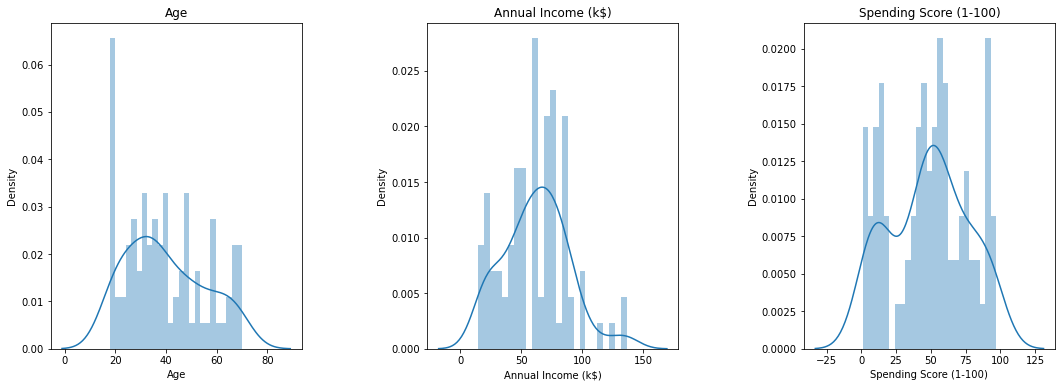

In [12]:
plt.figure(1 , figsize = (18 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.3 , wspace = 0.5)
    sns.distplot(df_m[x] , bins = 25)
    plt.title('{}'.format(x))
plt.show()

### Female Distplot

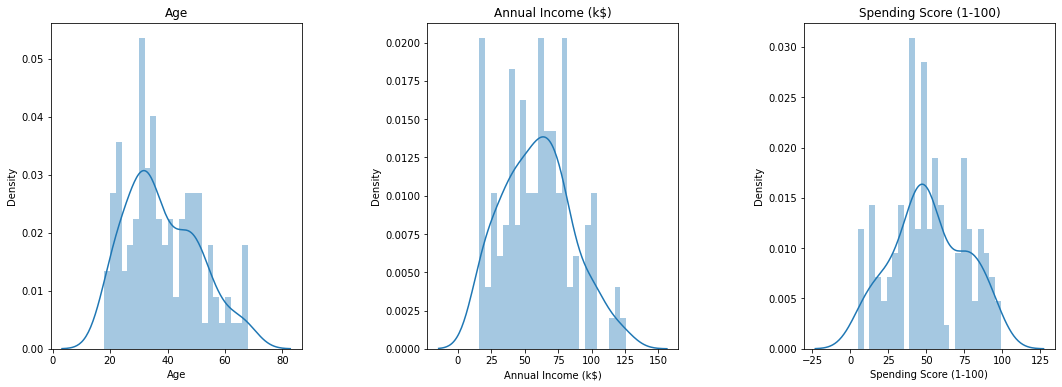

In [13]:
plt.figure(1 , figsize = (18 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.3 , wspace = 0.5)
    sns.distplot(df_f[x] , bins = 25)
    plt.title('{}'.format(x))
plt.show()

### Annual Income and Gender

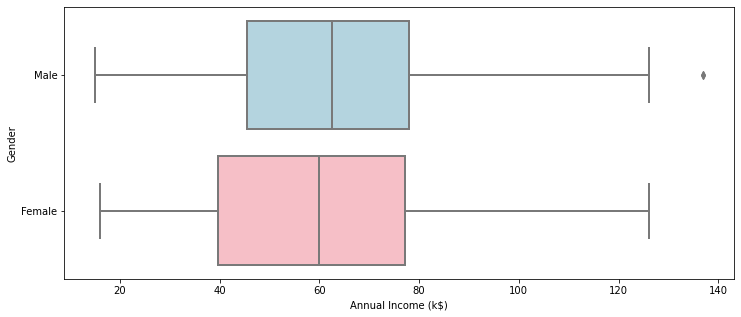

In [14]:
plt.figure(1 , figsize = (12 , 5))
sns.boxplot(x = df['Annual Income (k$)'], y = df['Gender'],palette = ['lightblue', 'lightpink'],linewidth = 2)
plt.show()

### Spending Score and Gender

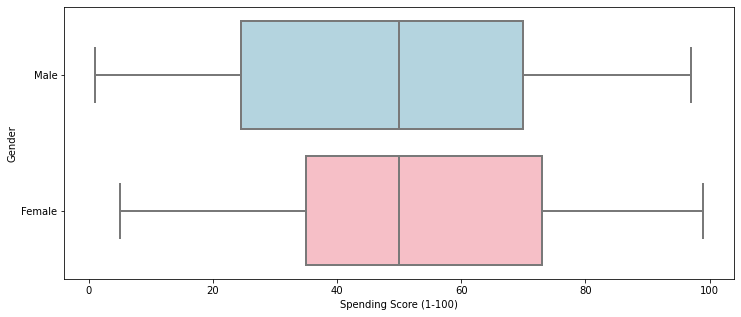

In [15]:
plt.figure(1 , figsize = (12 , 5))
sns.boxplot(x = df['Spending Score (1-100)'], y = df['Gender'],palette = ['lightblue', 'lightpink'],linewidth = 2)
plt.show()

### Spending Score and Age

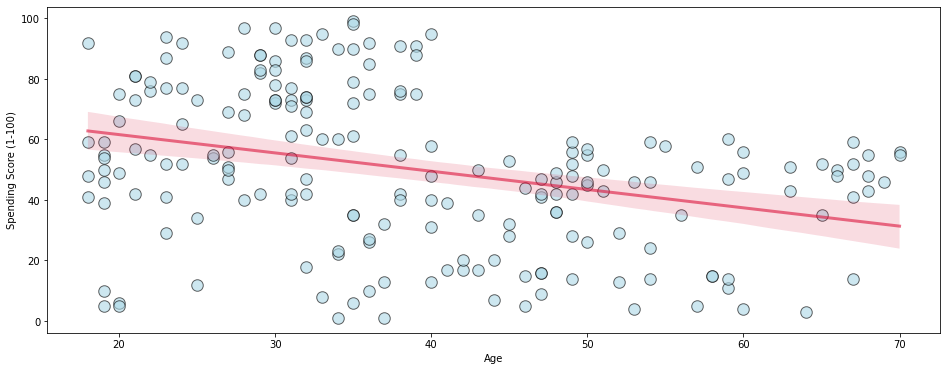

In [16]:
plt.figure(1 , figsize = (16 , 6))
sns.regplot(x = df['Age'],label = df['Gender'], y = df['Spending Score (1-100)'], 
    line_kws = dict(
        color = 'crimson',
        alpha = 0.6,
        lw = 3),
    scatter_kws = dict(
        color = 'lightblue',
        alpha = 0.6,
        lw = 1,
        s = 133,
        edgecolor = 'black'))
plt.show()

### Clustering

In [17]:
df_1 = df.copy()
df_1['Gender'] = df['Gender'].replace({'Male' : 0, 'Female' : 1})
df_1.drop('CustomerID', axis = 1, inplace = True) 
df_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [18]:
from sklearn.cluster import KMeans
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(df_1)
    inertia.append(algorithm.inertia_)

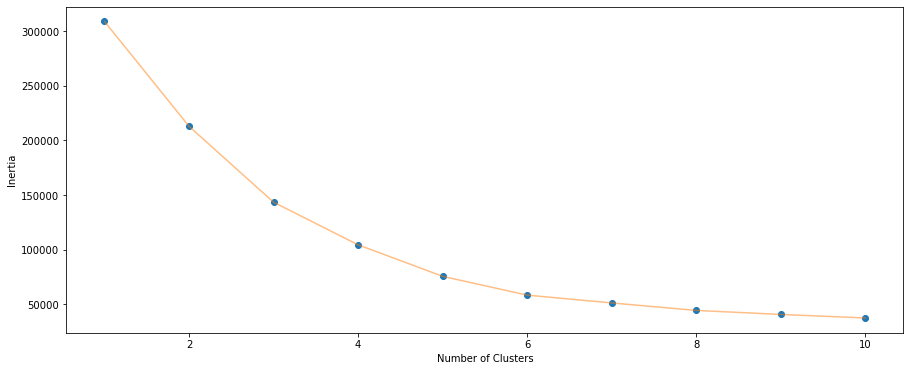

In [19]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### No. of clusters = 6

In [20]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001, random_state= 111, algorithm='elkan'))
algorithm.fit(df_1)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [21]:
df_1['cluster'] = labels
df_1['cluster'] = df_1['cluster'].replace({0 : 'cluster_0', 1 : 'cluster_1', 2 : 'cluster_2', 3 : 'cluster_3', 4 : 'cluster_4', 5 : 'cluster_5'})
df_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,19,15,39,cluster_4
1,0,21,15,81,cluster_5
2,1,20,16,6,cluster_4
3,1,23,16,77,cluster_5
4,1,31,17,40,cluster_4


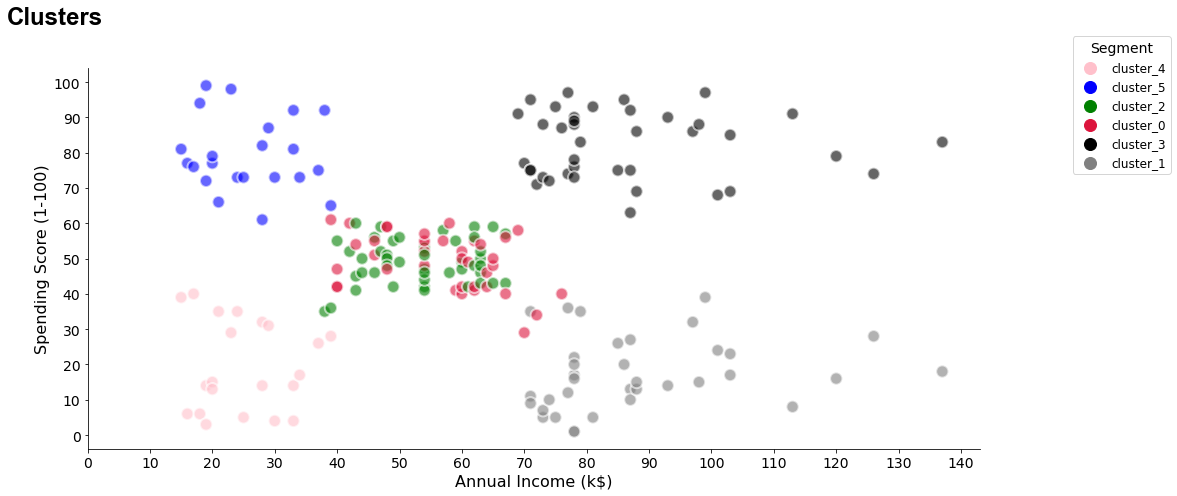

In [22]:
plt.figure(figsize = (16, 7))
ax = plt.axes() 

sns.scatterplot(
    x = df_1['Annual Income (k$)'],
    y = df_1['Spending Score (1-100)'],
    hue = df_1['cluster'],
    palette = ['pink', 'blue', 'green', 'crimson', 'black', 'grey'],
    s = 150,
    alpha = 0.6,
    linewidth = 2
)

sns.despine()
plt.xlabel(xlabel = 'Annual Income (k$)',color = 'black',fontsize = 16)
plt.ylabel(ylabel = 'Spending Score (1-100)',color = 'black',fontsize = 16)
plt.xticks(range(0, 141, 10),fontsize = 14)
plt.yticks(range(0, 101, 10),fontsize = 14)

plt.legend(
    loc = 1,
    bbox_to_anchor=(0.72, 0.6, 0.5, 0.5),
    fontsize = 12,
    markerscale = 2,
    title = 'Segment',
    title_fontsize = 14)

plt.title(
    label = 'Clusters',
    loc = 'left',
    y = 1.1,
    x = - 0.09,
    color = 'black',
    fontname = 'Arial',
    fontsize = 24,
    fontweight = 'bold'
)

plt.show()

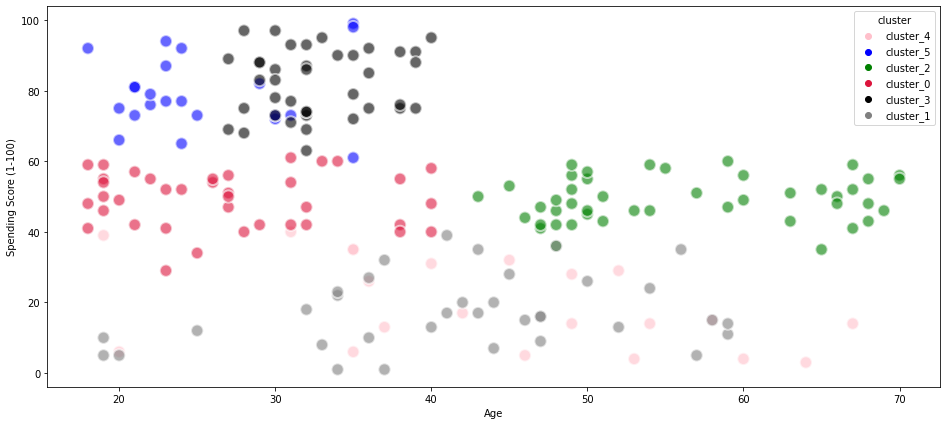

In [23]:
plt.figure(figsize = (16, 7))
ax = plt.axes() 

sns.scatterplot(
    x = df_1['Age'],
    y = df_1['Spending Score (1-100)'],
    hue = df_1['cluster'],
    palette = ['pink', 'blue', 'green', 'crimson', 'black', 'grey'],
    s = 150,
    alpha = 0.6,
    linewidth = 2
)
plt.show()

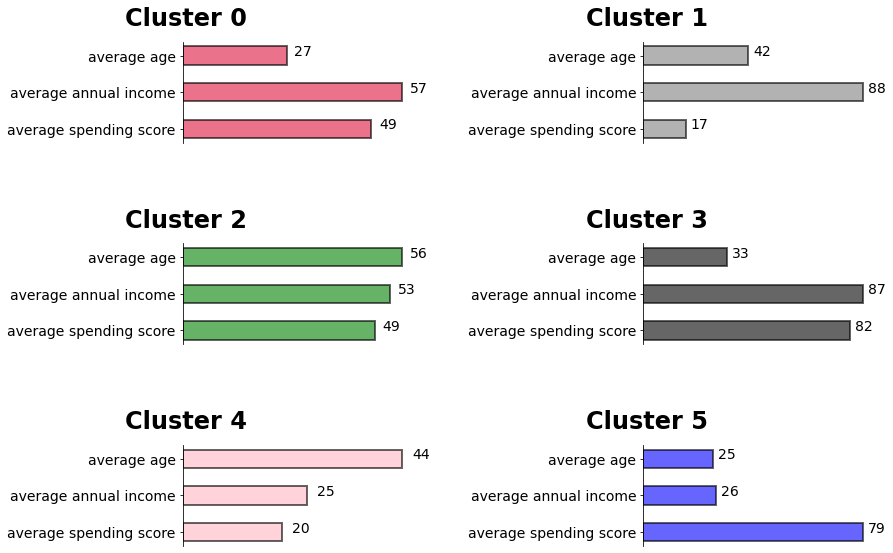

In [24]:
cluster_0_df = df_1[df_1['cluster'] == 'cluster_0']
cluster_1_df = df_1[df_1['cluster'] == 'cluster_1']
cluster_2_df = df_1[df_1['cluster'] == 'cluster_2']
cluster_3_df = df_1[df_1['cluster'] == 'cluster_3']
cluster_4_df = df_1[df_1['cluster'] == 'cluster_4']
cluster_5_df = df_1[df_1['cluster'] == 'cluster_5']

fig = plt.figure(figsize = (16, 7))

ax0 = fig.add_axes([0, 0, 0.2, 0.2])
ax1 = fig.add_axes([0.4, 0, 0.2, 0.2])
ax2 = fig.add_axes([0, -0.4, 0.2, 0.2])
ax3 = fig.add_axes([0.4, -0.4, 0.2, 0.2])
ax4 = fig.add_axes([0, -0.8, 0.2, 0.2])
ax5 = fig.add_axes([0.4, -0.8, 0.2, 0.2])


# Cluster 0
ax0.barh(
    y = ['average spending score', 'average annual income', 'average age'], 
    width = [round(cluster_0_df['Spending Score (1-100)'].mean()),
             round(cluster_0_df['Annual Income (k$)'].mean()),
             round(cluster_0_df['Age'].mean())],
    color = 'crimson', 
    height = 0.5, 
    alpha = 0.6,
    linewidth = 2,
    edgecolor = 'black'
)

ax0.grid(False)

ax0.set_yticklabels(
    labels = ['average spending score', 'average annual income', 'average age'],
    fontdict = dict(
        fontsize = 14
    ))

ax0.set_xticks([])

ax0.set_title(
    label = 'Cluster 0',
    loc = 'left',
    y = 1.1,
    x = - 0.25,
    fontsize = 24,
    fontweight = 'bold'
)

ax0.text(
    x = round(cluster_0_df['Age'].mean()) + 2, 
    y = 2, 
    s = f'''{round(cluster_0_df['Age'].mean())}''',
    fontsize = 14
)

ax0.text(
    x = round(cluster_0_df['Annual Income (k$)'].mean()) + 2, 
    y = 1, 
    s = f'''{round(cluster_0_df['Annual Income (k$)'].mean())}''',
    fontsize = 14
)

ax0.text(
    x = round(cluster_0_df['Spending Score (1-100)'].mean()) + 2, 
    y = 0, 
    s = f'''{round(cluster_0_df['Spending Score (1-100)'].mean())}''',
    fontsize = 14
)

# Cluster 1
ax1.barh(
    y = ['average spending score', 'average annual income', 'average age'], 
    width = [round(cluster_1_df['Spending Score (1-100)'].mean()),
             round(cluster_1_df['Annual Income (k$)'].mean()),
             round(cluster_1_df['Age'].mean())],
    color = 'grey', 
    height = 0.5, 
    alpha = 0.6,
    linewidth = 2,
    edgecolor = 'black'
)

ax1.grid(False)

ax1.set_yticklabels(
    labels = ['average spending score', 'average annual income', 'average age'],
    fontdict = dict(
        fontsize = 14
    ))

ax1.set_xticks([])

ax1.set_title(
    label = 'Cluster 1',
    loc = 'left',
    y = 1.1,
    x = - 0.25,
    fontsize = 24,
    fontweight = 'bold'
)

ax1.text(
    x = round(cluster_1_df['Age'].mean()) + 2, 
    y = 2, 
    s = f'''{round(cluster_1_df['Age'].mean())}''',
    fontsize = 14
)

ax1.text(
    x = round(cluster_1_df['Annual Income (k$)'].mean()) + 2, 
    y = 1, 
    s = f'''{round(cluster_1_df['Annual Income (k$)'].mean())}''',
    fontsize = 14
)

ax1.text(
    x = round(cluster_1_df['Spending Score (1-100)'].mean()) + 2, 
    y = 0, 
    s = f'''{round(cluster_1_df['Spending Score (1-100)'].mean())}''',
    fontsize = 14
)

# Cluster 2
ax2.barh(
    y = ['average spending score', 'average annual income', 'average age'], 
    width = [round(cluster_2_df['Spending Score (1-100)'].mean()),
             round(cluster_2_df['Annual Income (k$)'].mean()),
             round(cluster_2_df['Age'].mean())],
    color = 'green', 
    height = 0.5, 
    alpha = 0.6,
    linewidth = 2,
    edgecolor = 'black'
)

ax2.grid(False)

ax2.set_yticklabels(
    labels = ['average spending score', 'average annual income', 'average age'],
    fontdict = dict(
        fontsize = 14
    ))

ax2.set_xticks([])

ax2.set_title(
    label = 'Cluster 2',
    loc = 'left',
    y = 1.1,
    x = - 0.25,
    fontsize = 24,
    fontweight = 'bold'
)

ax2.text(
    x = round(cluster_2_df['Age'].mean()) + 2, 
    y = 2, 
    s = f'''{round(cluster_2_df['Age'].mean())}''',
    fontsize = 14
)

ax2.text(
    x = round(cluster_2_df['Annual Income (k$)'].mean()) + 2, 
    y = 1, 
    s = f'''{round(cluster_2_df['Annual Income (k$)'].mean())}''',
    fontsize = 14
)

ax2.text(
    x = round(cluster_2_df['Spending Score (1-100)'].mean()) + 2, 
    y = 0, 
    s = f'''{round(cluster_2_df['Spending Score (1-100)'].mean())}''',
    fontsize = 14
)


# Cluster 3
ax3.barh(
    y = ['average spending score', 'average annual income', 'average age'], 
    width = [round(cluster_3_df['Spending Score (1-100)'].mean()),
             round(cluster_3_df['Annual Income (k$)'].mean()),
             round(cluster_3_df['Age'].mean())],
    color = 'black', 
    height = 0.5, 
    alpha = 0.6,
    linewidth = 2,
    edgecolor = 'black'
)

ax3.grid(False)

ax3.set_yticklabels(
    labels = ['average spending score', 'average annual income', 'average age'],
    fontdict = dict(
        fontsize = 14
    ))

ax3.set_xticks([])

ax3.set_title(
    label = 'Cluster 3',
    loc = 'left',
    y = 1.1,
    x = - 0.25,
    fontsize = 24,
    fontweight = 'bold'
)

ax3.text(
    x = round(cluster_3_df['Age'].mean()) + 2, 
    y = 2, 
    s = f'''{round(cluster_3_df['Age'].mean())}''',
    fontsize = 14
)

ax3.text(
    x = round(cluster_3_df['Annual Income (k$)'].mean()) + 2, 
    y = 1, 
    s = f'''{round(cluster_3_df['Annual Income (k$)'].mean())}''',
    fontsize = 14
)

ax3.text(
    x = round(cluster_3_df['Spending Score (1-100)'].mean()) + 2, 
    y = 0, 
    s = f'''{round(cluster_3_df['Spending Score (1-100)'].mean())}''',
    fontsize = 14
)

# Cluster 4
ax4.barh(
    y = ['average spending score', 'average annual income', 'average age'], 
    width = [round(cluster_4_df['Spending Score (1-100)'].mean()),
             round(cluster_4_df['Annual Income (k$)'].mean()),
             round(cluster_4_df['Age'].mean())],
    color = 'lightpink', 
    height = 0.5, 
    alpha = 0.6,
    linewidth = 2,
    edgecolor = 'black'
)

ax4.grid(False)

ax4.set_yticklabels(
    labels = ['average spending score', 'average annual income', 'average age'],
    fontdict = dict(
        fontsize = 14
    ))

ax4.set_xticks([])

ax4.set_title(
    label = 'Cluster 4',
    loc = 'left',
    y = 1.1,
    x = - 0.25,
    fontsize = 24,
    fontweight = 'bold'
)

ax4.text(
    x = round(cluster_4_df['Age'].mean()) + 2, 
    y = 2, 
    s = f'''{round(cluster_4_df['Age'].mean())}''',
    fontsize = 14
)

ax4.text(
    x = round(cluster_4_df['Annual Income (k$)'].mean()) + 2, 
    y = 1, 
    s = f'''{round(cluster_4_df['Annual Income (k$)'].mean())}''',
    fontsize = 14
)

ax4.text(
    x = round(cluster_4_df['Spending Score (1-100)'].mean()) + 2, 
    y = 0, 
    s = f'''{round(cluster_4_df['Spending Score (1-100)'].mean())}''',
    fontsize = 14
)

# Cluster 5
ax5.barh(
    y = ['average spending score', 'average annual income', 'average age'], 
    width = [round(cluster_5_df['Spending Score (1-100)'].mean()),
             round(cluster_5_df['Annual Income (k$)'].mean()),
             round(cluster_5_df['Age'].mean())],
    color = 'blue', 
    height = 0.5, 
    alpha = 0.6,
    linewidth = 2,
    edgecolor = 'black'
)

ax5.grid(False)

ax5.set_yticklabels(
    labels = ['average spending score', 'average annual income', 'average age'],
    fontdict = dict(fontsize = 14)
)

ax5.set_xticks([])

ax5.set_title(
    label = 'Cluster 5',
    loc = 'left',
    y = 1.1,
    x = - 0.25,
    fontsize = 24,
    fontweight = 'bold'
)

ax5.text(
    x = round(cluster_5_df['Age'].mean()) + 2, 
    y = 2, 
    s = f'''{round(cluster_5_df['Age'].mean())}''',
    fontsize = 14
)

ax5.text(
    x = round(cluster_5_df['Annual Income (k$)'].mean()) + 2, 
    y = 1, 
    s = f'''{round(cluster_5_df['Annual Income (k$)'].mean())}''',
    fontsize = 14
)

ax5.text(
    x = round(cluster_5_df['Spending Score (1-100)'].mean()) + 2, 
    y = 0, 
    s = f'''{round(cluster_5_df['Spending Score (1-100)'].mean())}''',
    fontsize = 14
)
sns.despine(bottom = True)
plt.show()